Fix correlation functions to have C_f(x=0) = 1 always

What does this mean in Fourier space?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq,fftshift,fft,ifft,fftn,ifftn
from numpy import exp,sin,sqrt,power,pi

In [2]:
N = 1024
Ltotal = 1.
L = 0.125

In [3]:
X = fftfreq(N) * Ltotal
K = fftfreq(N) * N
K2 = K*K

First, define correlation function in real space, get spectra numerically and recover corrf. numerically. They match

In [4]:
kernelx = (1.-X*X/L**2)*np.exp(-.5*X**2/L/L) # exponential correlation function
kernelk = np.sqrt(fft(kernelx))
kernelk[0] = 0.

kernelx2 = np.real( ifft( kernelk**2 ) )

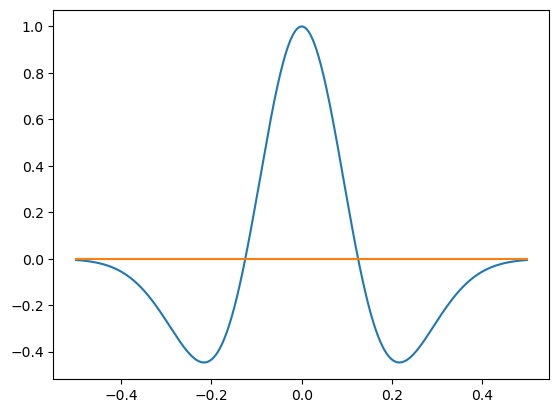

In [5]:
plt.plot(fftshift(X),fftshift(kernelx2))
plt.plot(fftshift(X),fftshift(kernelx2)-fftshift(kernelx))
plt.show()

In [6]:
# numerical evaluation of correlation length


Again, the same as above, with a different correlation function

In [7]:
kernelx = np.sinc(pi*X/L) # exponential correlation function
kernelk = np.sqrt(fft(kernelx))
#kernelk[0] = 0.

kernelx2 = np.real( ifft( kernelk**2 ) )

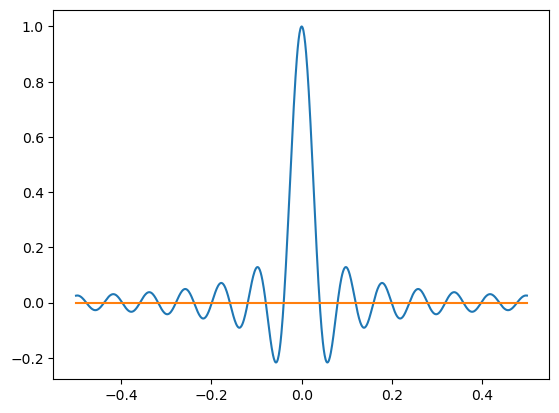

In [8]:
plt.plot(fftshift(X),fftshift(kernelx2))
plt.plot(fftshift(X),fftshift(kernelx2)-fftshift(kernelx))
plt.show()

Define spectra in Fourier space and get correlation function with C_f(x=0) = 1

# 1D Flat Spectrum, A Few k

In [14]:
kernelk = np.where( (np.abs(K) >= 3.) & (np.abs(K) <= 8.), sqrt(N), 0.)
kernelk = kernelk / sqrt(np.count_nonzero(kernelk))
kernelx2 = np.real( ifft( kernelk**2 ) )

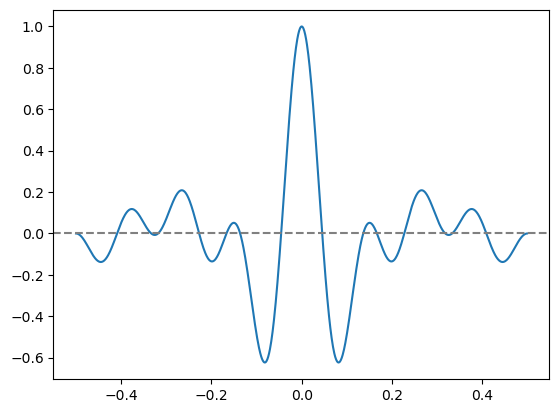

In [15]:
plt.plot(fftshift(X),fftshift(kernelx2))
plt.axhline(y=0.,linestyle='dashed',color='gray')
plt.show()

# 1D Flat Spectrum, All k

In [16]:
N=1024
X=np.fft.fftfreq(N)

In [17]:
kernelk = np.ones(N)*np.sqrt(N)
kernelk = kernelk / np.sqrt(np.count_nonzero(kernelk))
kernelx2 = np.real( ifft( kernelk**2 ) )

In [18]:
# in real space, only one frequency is nonzero, and equal to one
print(np.count_nonzero(np.abs(kernelx2)))
print(np.max(np.abs(kernelx2)))
print(np.min(np.abs(kernelx2)))

1
1.0
0.0


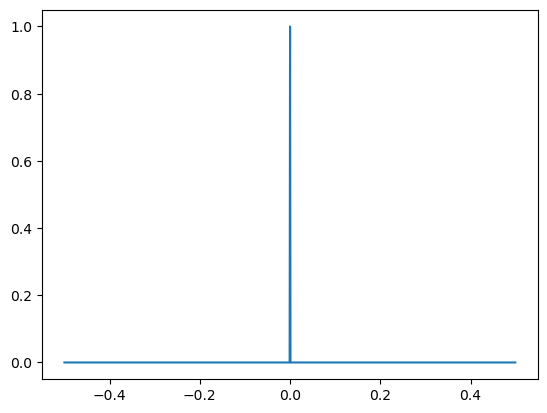

In [19]:
plt.plot(fftshift(X),fftshift(kernelx2))
plt.show()

# 2D Flat Spectrum, All k

In [20]:
N = 1024

In [21]:
kernelk = np.ones((N,N))
kernelk = kernelk
kernelx2 = np.real( ifftn( kernelk**2 ) )

In [22]:
kernelx2[1:].shape

(1023, 1024)

In [23]:
# in real space, only one frequency is nonzero, and equal to one
# check that only one frequency is nonzero
print(np.count_nonzero(np.abs(kernelx2[0])))
# check that the only nonzero frequency is equal to one
print(np.max(np.abs(kernelx2[0])))
print(np.min(np.abs(kernelx2[0])))
# all other lines have no nonzero elements
print(np.max(np.abs(kernelx2[1:])))
print(np.min(np.abs(kernelx2[1:])))

1
1.0
0.0
0.0
0.0


# 3D Flat Spectrum, All k

In [18]:
N = 512

In [19]:
kernelk = np.ones((N,N,N))
kernelk = kernelk
kernelx2 = np.real( ifftn( kernelk**2 ) )

In [20]:
# in real space, only one frequency is nonzero, and equal to one
# check that only one frequency is nonzero
print(np.count_nonzero(np.abs(kernelx2[0])))
# check that the only nonzero frequency is equal to one
print(np.max(np.abs(kernelx2[0])))
print(np.min(np.abs(kernelx2[0])))
# all other lines have no nonzero elements
print(np.max(np.abs(kernelx2[1:])))
print(np.min(np.abs(kernelx2[1:])))

1
1.0
0.0
0.0
0.0


# 2D Flat Spectrum, A Few k

In [46]:
N = 512
X = np.fft.fftfreq(N)
K = fftfreq(N) * N
KX,KY = np.meshgrid(K,K)
K2 = KX*KX+KY*KY
absK = sqrt(K2)

In [47]:
kernelk = np.where( (absK >= 4.) & (absK <= 9.), N, 0.)
kernelk = kernelk / sqrt(np.count_nonzero(kernelk))
kernelx2 = np.real( ifftn( kernelk**2 ) )

In [48]:
print(np.count_nonzero(np.abs(kernelx2[0])))
print(np.max(np.abs(kernelx2[0])))
print(np.min(np.abs(kernelx2[0])))
print(np.max(np.abs(kernelx2[1:])))
print(np.min(np.abs(kernelx2[1:])))

512
1.0
0.00021048334797110942
0.9982132927912453
7.736530455463783e-07


# 3D Flat Spectrum, A Few k

In [49]:
dim = 3
N = 512
X = np.fft.fftfreq(N)
K = fftfreq(N) * N
KX,KY,KZ = np.meshgrid(K,K,K)
K2 = KX*KX+KY*KY+KZ*KZ
absK = sqrt(K2)
del KX,KY,KZ

In [50]:
kernelk = np.where( (absK >= 4.) & (absK <= 9.), power(N,.5*dim), 0.)
kernelk = kernelk / sqrt(np.count_nonzero(kernelk))
kernelx2 = np.real( ifftn( kernelk**2 ) )

In [51]:
print(np.count_nonzero(np.abs(kernelx2[0])))
print(np.max(np.abs(kernelx2[0])))
print(np.min(np.abs(kernelx2[0])))
print(np.max(np.abs(kernelx2[1:])))
print(np.min(np.abs(kernelx2[1:])))

262144
1.0
3.9606452878872614e-08
0.9986875384676956
2.9322988134850014e-10
